# Статистика, DS-поток
## Задание SP.5

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Баллы за задание:**

* Задача 1 &mdash;  80 баллов
* Задача 2 &mdash;  50 баллов
* Задача 3 &mdash;  150 баллов

**Важность задач:**

* *высокая:* задача 1, 2;
* *средне-высокая:* задача 3.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.


In [317]:
# Bot check

# HW_ID: ds_sp5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [318]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, palette='Set2')

-----

## Задача 1.
Пусть $\widehat{\theta}$ &mdash; оценка параметра $\theta$ и $\textrm{MSE}_{\widehat{\theta}} (\theta) = \mathsf{E}_{\theta} \left(\widehat{\theta} - \theta\right)^2$ &mdash; среднеквадратичная ошибка оценки $\widehat{\theta}$. Тогда справедливо bias-variance разложение:
$$\textrm{MSE}_{\widehat{\theta}} (\theta) = \textrm{bias}_{\widehat{\theta}}^2(\theta) + \textrm{var}_{\widehat{\theta}} (\theta)$$
$$\textrm{bias}_{\widehat{\theta}} (\theta) = \mathsf{E}_{\theta} \widehat{\theta} - \theta; $$
$$\textrm{var}_{\widehat{\theta}} (\theta) = \mathsf{D}_{\theta} \widehat{\theta}.$$

*a).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathcal{K} = \left\{c_n X_{(n)}, c_n\in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:** 

Рассмотрим $\hat{\theta} = c_n \cdot X_{(n)}$ 

bias = $E\hat{\theta} - \theta = c_n \cdot \frac{n}{n+1}\theta - \theta$

variance = $D\hat{\theta} = c_n^2 \cdot DX_{(n)} = c_n^2 \cdot \frac{n}{(n+1)^2(n+2)} \theta^2$

Тогда bias-variance разложение имеет вид:
$$
\left(c_n \cdot \frac{n}{n+1} - 1\right)^2\theta^2 + c_n^2 \cdot \frac{n}{(n+1)^2(n+2)} \theta^2
$$

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отображена информативная часть графика (по оси *x* примерно от `0.9` до `1.4`). Не забудьте добавить сетку и легенду, а также подписать оси.

На графике проведите вертикальные линии с координатами $c$, соответствующими минимуму функции риска, несмещенной оценке и ОМП.

Сделайте выводы. Какое значение $c_n$ дает минимум функции риска? Каково поведение компонент разложения? Как соотносятся полученные оценки?

**Решение:**

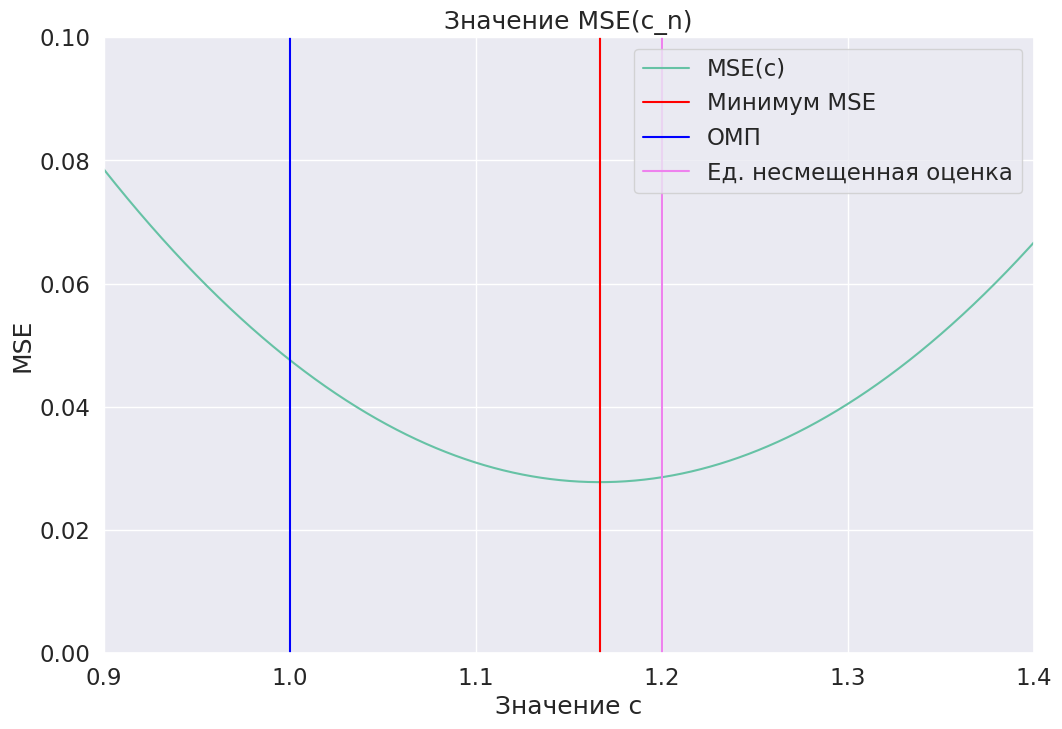

In [319]:
theta = 1
n = 5

c = np.linspace(-1, 2, 100000)


def biase_variance_uniform(theta, n, c):
    MSE = (c * n / (n + 1) - 1) ** 2 * theta**2 + c**2 * n / (
        (n + 1) ** 2 * (n + 2)
    ) * theta**2

    return MSE


plt.figure(figsize=(12, 8))
plt.plot(c, biase_variance_uniform(theta, n, c), label="MSE(c)")

plt.axvline(x=(n + 2) / (n + 1), color="red", label="Минимум MSE")
plt.axvline(x=1, color="blue", label="ОМП")
plt.axvline(x=(n+1)/n, color = "violet", label="Ед. несмещенная оценка")

plt.xlabel("Значение c")
plt.ylabel("MSE")
plt.title("Значение MSE(c_n)")

plt.xlim((0.9, 1.4))
plt.ylim((0, 0.1))

plt.legend()
plt.show()

**Вывод:** Как видим, практика подверждает, что MSE достигает минимума при $c_{\min} = \frac{n+2}{n+1}$. Заметим, что несмещенная оценка в пределе совпадает с $c_{\min}$.

*b).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $\mathcal{N}(a, \sigma^2)$, где $a$ и $\sigma$ неизвестны. Для величины $\sigma^2$ рассмотрим класс оценок $\mathcal{K} = \left\{\frac{1}{c_n}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, \; c_n \in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:** 

bias = $\left(\frac{n - 1}{c_n} - 1\right) \sigma^2$

variance = $\frac{2}{c_n^2}\sigma^4(n-1)$

bias-variance разложение:
$$
\text{bias}^2 + \text{variance} = \left( \frac{n - 1}{c_n} - 1 \right)^2\sigma^4 + \frac{2}{c_n^2} (n - 1)\sigma^4 
$$

Повторите исследование, аналогичное пункту *a)* для $a = 0, \sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика рядом с помощью функции `plt.subplot`. Не забудьте сделать выводы.

**Решение:**

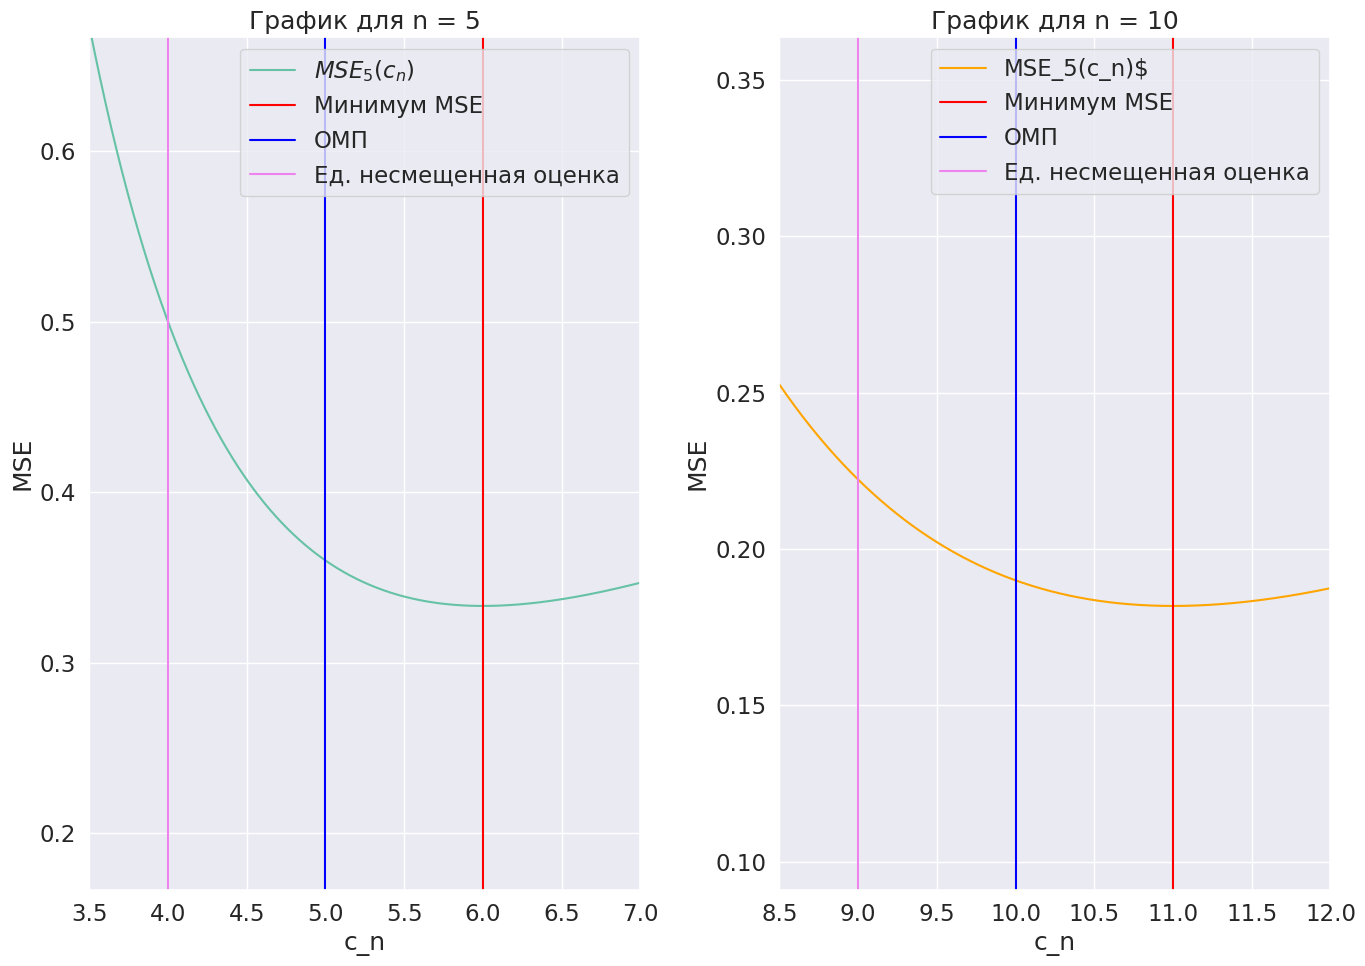

In [320]:
def bias_variance_norm(c_n, sigma_2, n):
    bias = ((n - 1) / c_n - 1) * sigma_2
    bias_squared = bias**2

    variance = (2 / c_n**2) * sigma_2**2 * (n - 1)

    MSE = bias_squared + variance

    return MSE


a = 0
sigma_2 = 1
n_values = [5, 10]
c_n_values = np.linspace(0.1, 50, 10000)  

plt.figure(figsize=(14, 10))

plt.subplot(1, 2, 1)
MSE_n5 = [bias_variance_norm(c, sigma_2, n_values[0]) for c in c_n_values]
plt.plot(c_n_values, MSE_n5, label=fr"$MSE_{n_values[0]}(c_n)$")

plt.axvline(x=n_values[0] + 1, color="red", label="Минимум MSE")
plt.axvline(x=n_values[0], color="blue", label="ОМП")
plt.axvline(x=n_values[0] - 1, color="violet", label="Ед. несмещенная оценка")

plt.xlabel(r"c_n")
plt.ylabel("MSE")
plt.title(f"График для n = {n_values[0]}")
plt.grid(True)

plt.xlim((n_values[0] - 1.5, n_values[0] + 2))
plt.ylim((np.min(MSE_n5) / 2, 2 * np.min(MSE_n5)))


plt.tight_layout()
plt.legend()


plt.subplot(1, 2, 2)
MSE_n10 = [bias_variance_norm(c, sigma_2, n_values[1]) for c in c_n_values]
plt.plot(c_n_values, MSE_n10, label=fr"MSE_{n_values[0]}(c_n)$", color="orange")

plt.axvline(x=n_values[1] + 1, color="red", label="Минимум MSE")
plt.axvline(x=n_values[1], color="blue", label="ОМП")
plt.axvline(x=n_values[1] - 1, color="violet", label="Ед. несмещенная оценка")

plt.xlim((n_values[1] - 1.5, n_values[1] + 2))
plt.ylim((np.min(MSE_n10) / 2, 2 * np.min(MSE_n10)))

plt.xlabel(r"c_n")
plt.ylabel("MSE")
plt.title(f"График для n = {n_values[1]}")
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()

**Вывод:** И вновь, практика подверждает теорию, MSE действительно достигает минимума в обоих случаях при $c_n = n + 1$.
Заметим, что в этот раз ни одна оценка в пределе не равна другой.

Сделайте вывод по результатам пунктов *a)*, *b)*.

**Общий вывод:** Мы на практике проверили, что при минимальной с/к оценке MSE минимизируется. Также заметим, что в некоторых случаях оценки (например несмещенная оценка в п. a)) могут при увеличении выборки совпадать с минимальной оценкой в с/к подходе. 

Самое важное --  минимум риска не всегда достигается в несмещенной оценке или ОМП, таким образом эти оценки не всегда являются лучшими.



---
## Задача 2.
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом $0.01$ сгенерируйте $5000$ независимых выборок $X^1=\left(X^1_1, \dots, X^1_{100} \right), \dots, X^{5000} = \left(X^{5000}_1, \dots, X^{5000}_{100} \right)$ из распределения $U[0, \theta]$.

Рассмотрим одну из перечисленных выше оценок $\widehat{\theta}$. Посчитайте ее значение по каждой выборке. Тем самым, для данного $\theta$ получится $5000$ реализаций этой оценки $\widehat{\theta}_1, ..., \widehat{\theta}_{5000}$, где значение $\widehat{\theta}_j$ посчитано по реализации выборки $X^j$.

Теперь можно оценить функцию риска этой оценки с помощью усреднения
$$\widehat{R}_{\widehat{\theta}}(\theta) = \frac{1}{5000}\sum\limits_{j=1}^{5000} L\left(\widehat{\theta}_j, \theta\right),$$
где $L$ — одна из двух функций потерь: квадратичная $L(x, y)=(x-y)^2$ и линейная $L(x, y)=\left|x-y\right|$.

Для каждого из типов функций потерь постройте свой график. Нанесите на этот график для каждой из четырех оценок $\widehat{\theta}$ оценку функции потерь $\widehat{R}_{\widehat{\theta}}(\theta)$. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

*Совет*: при тестировании кода запускайте его с небольшими размерами данных. Например, используйте 100 реализаций выборок. Финальные результаты получите, поставив требуемые значения размеров данных.

В задаче доспустимо использовать короткие циклы, то есть с малым количествои итераций.

**Решение:**

In [321]:
theta_values = np.arange(0.01, 2.01, 0.01)
num_samples = 5000
sample_size = 100
num_theta = len(theta_values) 

samples_array = np.zeros((num_theta, num_samples, sample_size))

for i, theta in enumerate(theta_values):
    samples = np.random.uniform(0, theta, size=(num_samples, sample_size))
    samples_array[i] = samples

In [322]:
def hat_theta_1(samples):
    return np.mean(samples, axis=2)


def hat_theta_2(samples, n):
    return (n + 1) * np.min(samples, axis=2)


def hat_theta_3(samples):
    return np.min(samples, axis=2) + np.max(samples, axis=2)


def hat_theta_4(samples, n):
    return (n + 1) / n * np.max(samples, axis=2)

In [323]:
def MSE(theta, estimates):
    return np.mean((estimates - theta[:, None])**2, axis=1)

def MAE(theta, estimates):
    return np.mean(np.abs(estimates - theta[:, None]), axis=1)

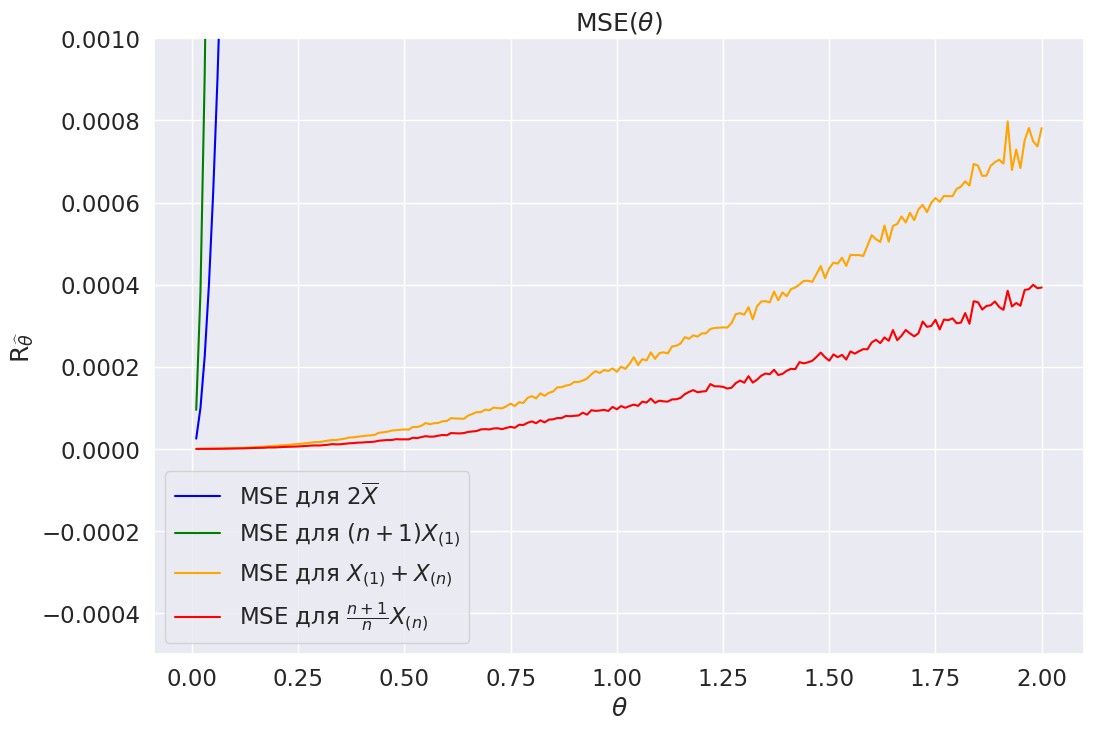

In [324]:
theta_1 = hat_theta_1(samples_array)
theta_2 = hat_theta_2(samples_array, sample_size)
theta_3 = hat_theta_3(samples_array)
theta_4 = hat_theta_4(samples_array, sample_size)

mse_theta_1 = MSE(theta_values, theta_1)
mse_theta_2 = MSE(theta_values, theta_2)
mse_theta_3 = MSE(theta_values, theta_3)
mse_theta_4 = MSE(theta_values, theta_4)

plt.figure(figsize=(12, 8))
plt.plot(theta_values, mse_theta_1, label=r"MSE для $2\overline{X}$", color='blue')
plt.plot(theta_values, mse_theta_2, label=r"MSE для $(n + 1)X_{(1)}$", color='green')
plt.plot(theta_values, mse_theta_3, label=r"MSE для $X_{(1)} + X_{(n)}$", color='orange')
plt.plot(theta_values, mse_theta_4, label=r"MSE для $\frac{n+1}{n}X_{(n)}$", color='red')

plt.ylabel(r"$\text{R}_{\widehat{\theta}}$")
plt.xlabel(r"$\theta$")
plt.title(r"MSE($\theta$)")
plt.legend()

plt.ylim(-0.0005, 0.001)

plt.show()


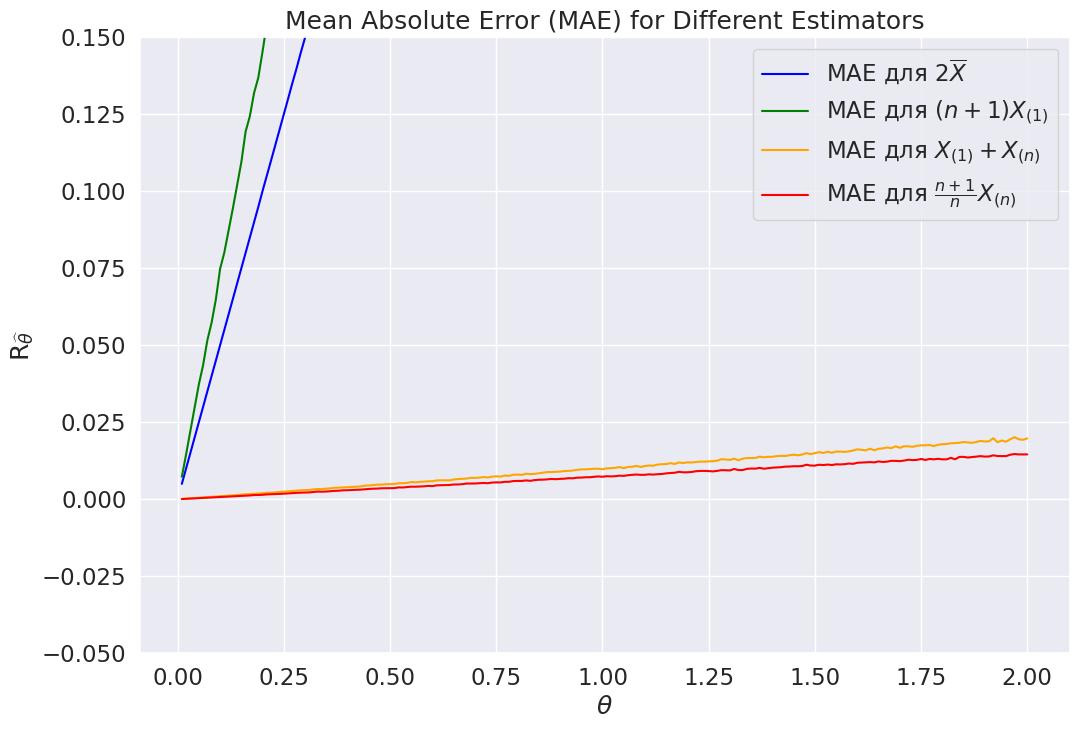

In [325]:
theta_1 = hat_theta_1(samples_array)
theta_2 = hat_theta_2(samples_array, sample_size)
theta_3 = hat_theta_3(samples_array)
theta_4 = hat_theta_4(samples_array, sample_size)

mae_theta_1 = MAE(theta_values, theta_1)
mae_theta_2 = MAE(theta_values, theta_2)
mae_theta_3 = MAE(theta_values, theta_3)
mae_theta_4 = MAE(theta_values, theta_4)

plt.figure(figsize=(12, 8))
plt.plot(theta_values, mae_theta_1, label=r"MAE для $2\overline{X}$", color='blue')
plt.plot(theta_values, mae_theta_2, label=r"MAE для $(n + 1)X_{(1)}$", color='green')
plt.plot(theta_values, mae_theta_3, label=r"MAE для $X_{(1)} + X_{(n)}$", color='orange')
plt.plot(theta_values, mae_theta_4, label=r"MAE для $\frac{n+1}{n}X_{(n)}$", color='red')

# Add labels and title
plt.ylabel(r"$\text{R}_{\widehat{\theta}}$")
plt.xlabel(r"$\theta$")
plt.title("Mean Absolute Error (MAE) for Different Estimators")
plt.legend()

plt.ylim(-0.05, 0.15)

plt.show()

Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод:** Условимся знаком $\leq$ обозначать, что одна оценка не хуже другой. По графикам можно определить:

В равномерном подходе: 

MSE: $\frac{n+1}{n}X_{(n)} \leq X_{(1)} + X_{(n)} \leq 2\overline{X} \leq (n + 1)X_{(1)}$  
                      
MAE: $\frac{n+1}{n}X_{(n)} \leq X_{(1)} + X_{(n)} \leq 2\overline{X} \leq (n + 1)X_{(1)}$

В минимаксном подходе:

MSE: $\frac{n+1}{n}X_{(n)} \leq X_{(1)} + X_{(n)} \leq 2\overline{X} \leq (n + 1)X_{(1)}$  
                      
MAE: $\frac{n+1}{n}X_{(n)} \leq X_{(1)} + X_{(n)} \leq 2\overline{X} \leq (n + 1)X_{(1)}$

В байесовском пододе:

MSE: $\frac{n+1}{n}X_{(n)} \leq X_{(1)} + X_{(n)} \leq 2\overline{X} \leq (n + 1)X_{(1)}$  
                      
MAE: $\frac{n+1}{n}X_{(n)} \leq X_{(1)} + X_{(n)} \leq 2\overline{X} \leq (n + 1)X_{(1)}$


---
###  Задача 3.
Пусть $X = \left( X_1, \dots, X_n \right), n = 9$ &mdash; выборка из распределения $Bern(\theta), \theta \in [0, 1]$. При сравнении оценок будем рассматривать среднеквадратичный риск $MSE_{\widehat{\theta}}(\theta) = \mathsf{E}_\theta \left(\widehat{\theta} - \theta\right)^2$

Известно, что оценка $\overline{X}$  параметра сдвига $\theta$ является наилучшей оценкой в среднеквадратичном подходе среди всех несмещенных оценок.
В минимаксном подходе среди всех оценок наилучшей является оценка Ходжеса-Лемана: $\widetilde{\theta} = \overline{X} + \frac{1}{1 + \sqrt{n}} \left(\frac{1}{2} - \overline{X} \right).$
Сравним точность оценок $\overline{X}$ и $\widetilde{\theta}$.

Т.к. $E\overline{X} = EX_1 = \theta$, то

$$
MSE_{\overline{X}}(\theta) = E(\overline{X} - E\theta)^2 = D{\overline{X}} = \frac{1}{n}DX_1 = \frac{\theta(1 - \theta)}{n}
$$

В ST.5 получили:

$$
MSE_{\tilde{\theta}}(\theta) = \frac{1}{4(1 + \sqrt{n})^2}
$$

**1.** Нанесите на один график функции риска $MSE_{\overline{X}} (\theta)$ и $MSE_{\widetilde{\theta}} (\theta)$. Численно посчитайте долю тех $\theta$, при которых $MSE_{\widetilde{\theta}} (\theta) < MSE_{\overline{X}} (\theta)$. 

**Решение:**

In [326]:
def mse_mean(theta, n):
    return theta * (1 - theta) / n


def mse_hojes_leman(n, size):
    return  1 / (4 * (1 + np.sqrt(n)) ** 2) * np.ones(size)


In [327]:
n = 9
size = 1000
theta = np.linspace(0.01, 1, size)
X = np.random.binomial(1, theta[:, np.newaxis], size=(theta.shape[0], n))

In [328]:
mse_theta_mean = mse_mean(theta, n)
mse_theta_hojes_leman = mse_hojes_leman(n, size)


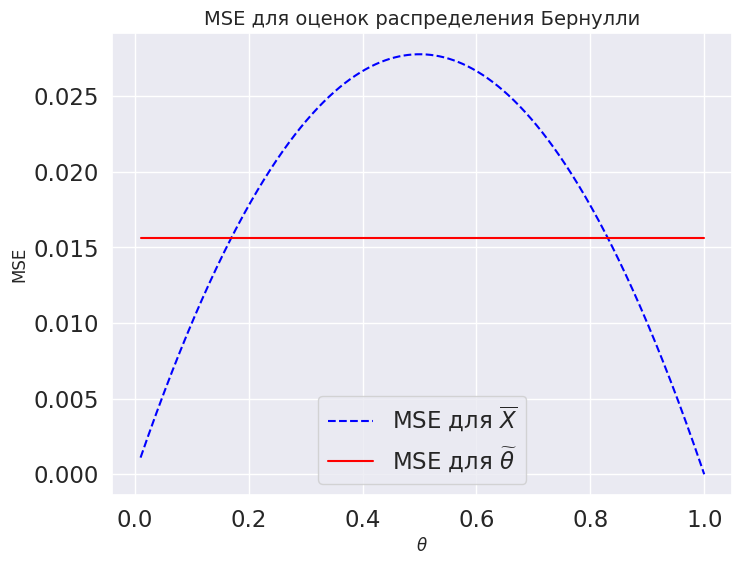

In [329]:
plt.figure(figsize=(8, 6))

plt.plot(
    theta,
    mse_theta_mean,
    label=r"MSE для $\overline{X}$",
    color="blue",
    ls="--",
    alpha=1,
)
plt.plot(
    theta,
    mse_theta_hojes_leman,
    label=r"MSE для $\widetilde{\theta}$",
    color="red",
    alpha=1,
)

plt.xlabel(r"$\theta$", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.title("MSE для оценок распределения Бернулли", fontsize=14)

plt.legend()
plt.show()

In [330]:
fraction_theta = np.mean(mse_theta_hojes_leman < mse_theta_mean)
print(f"Доля требуемых theta равна {fraction_theta:.2f}")

Доля требуемых theta равна 0.67


**Ответ:** Как видим, графики риска при использовании оценок почти сливаются. Тем не менее оценка Ходжеса-Лемана в 66% случаев лучше, чем среднее.
 
Из графика видим, что оценку Ходжеса Лемана имеет смысл выбирать если $\theta$ лежит примерно в (0.2, 0.8).

**2.** Проведите эксперимент. Сгенерируйте параметры $\theta = \left( \theta_1, \dots, \theta_{1000} \right)$ из распределения $U[0, 1]$ независимо, после чего сгенерируйте выборки $X_k = \left( X_{k1}, \dots, X_{kn} \right) \sim Bern(\theta_k), \; 1 \leqslant k \leqslant 1000, \; n=9$.

По каждой из выборок $X_k$ вычислите оценки $\overline{X_k}$ и $\widetilde{\theta}_k$ и определите, какая из них ближе к $\theta_k$. В какой доле случаев оценка Ходжеса-Лемана оказалась лучше? Похож ли результат на ответ в прошлом пункте? Почему?

**Решение:**

In [331]:
n = 9
size = 1000
thetas = np.random.uniform(0, 1, size=size)

X = np.random.binomial(1, thetas[:, np.newaxis], size=(thetas.shape[0], n))

In [332]:
def hojes_leman_estimation(X, n):
    factor = 1 / (1 + np.sqrt(n))
    mean = np.mean(X, axis=1)

    return mean + factor * (0.5 - mean)

In [333]:
X_mean = np.mean(X, axis=1)
X_hojes_leman = hojes_leman_estimation(X, n)

result = np.abs(X_hojes_leman - thetas) < np.abs(X_mean - thetas)

fraction = result.sum() / size
print(f"Оценка Ходжеса Лемана оказалась лучше в {100 * fraction:.0f}% случаев")

Оценка Ходжеса Лемана оказалась лучше в 49% случаев


**Вывод:** Ответ различается с пунктом 1. Это связано с тем, что теперь мы стали использовать другую формулу функции потерь, а именно -- абсолютную ошибку. То есть мы в отличие от пункта 1 даже не получили значение функции риска, а просто оценили ошибку на разных выборках.

**3.**  Рассмотрим функцию $p(\theta) = \mathsf{P}_{\theta} \left(\left|\widetilde{\theta} - \theta \right| < \left| \overline{X} - \theta \right| \right)$ &mdash; вероятность того, что оценка $\widetilde{\theta}$ оказалась ближе к $\theta$, чем $\overline{X}$. Можно показать, что при $\theta \leqslant 1/2$ верно равенство $p(\theta) = 1 - \mathsf{P}_{\theta} \left( \frac{\theta - d_n}{1-2d_n} \leqslant \overline{X} \leqslant \frac12 \right)$, где $d_n = \frac{1}{4\left(1+\sqrt{n}\right)}$, причем функция $p(\theta)$ симметрична относительно $1/2$. Такую вероятность можно вычислить, используя функцию распределения (`cdf`) биномиального распределения.
Если параметр $\theta$ случаен, то вероятность того, что оценка $\widetilde{\theta}$ окажется ближе к $\theta$, равна $p_* = \int\limits_0^1 p(t) dt$, что соответствует площади под кривой графика функции $p(\theta)$.

Постройте график функции $p(\theta)$. Посчитайте вероятность $p_*$ с помощью метода Монте-Карло. Сделайте выводы.

**Решение:**

In [334]:
def p_theta(theta, n, d_n):
    tmp_theta = np.where(theta > 0.5, 1 - theta, theta)

    bound_lower = (tmp_theta - d_n) / (1 - 2 * d_n)
    p_value = 1 - (sps.binom.cdf(n // 2, n, tmp_theta) - sps.binom.cdf(bound_lower * n, n, tmp_theta))
    return p_value

In [335]:
n = 9
d_n = 1 / (4 * (1 + np.sqrt(n)))
theta_values = np.linspace(0, 1, 1000)
p_values = p_theta(theta_values, n, d_n)


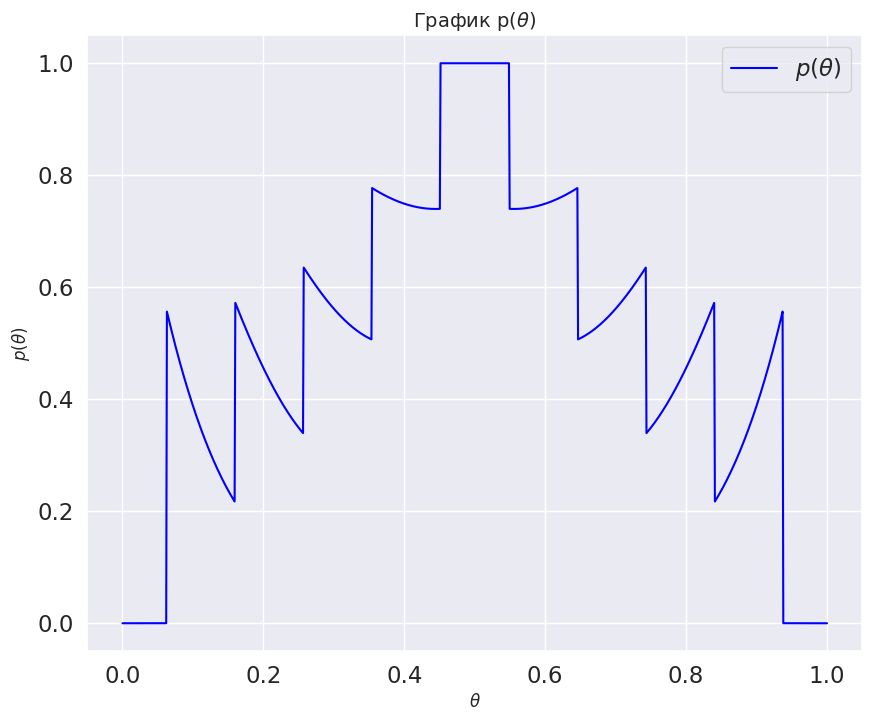

In [336]:
plt.figure(figsize=(10, 8))
plt.plot(theta_values, p_values, label=r"$p(\theta)$", color="blue")

plt.xlabel(r"$\theta$", fontsize=12)
plt.ylabel(r"$p(\theta)$", fontsize=12)
plt.title(r"График p($\theta$)", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

При помощи метода Монте-Карло посчитаем вероятность $p^*$

In [337]:

def calculate_integral_monte_carlo(num_samples, n, d_n, left_border, right_border):
    theta_samples = np.random.uniform(0, 1, num_samples)
    return  np.mean(p_theta(theta_samples, n, d_n)) * (right_border - left_border)

num_samples = 10000
p_star = calculate_integral_monte_carlo(num_samples, n, d_n, 0, 1)
print(f"Требуемый инеграл равен {p_star:.2f}")

Требуемый инеграл равен 0.51


**Ответ:** Как видим, вероятность того, что оценка Ходжеса-Лемана окажется лучше среднего ведет себя в виде своего рода затухающих сигналов. Причем наверняка сказать, что оценка Ходжеса-Лемана лучше среднего можно лишь на крайне узком участке $\theta$. Как и было сказано в теории, эта вероятность симметрична относительно 1/2.

Заметим, что подсчитанный интеграл(т.е. $p^*$) суть доли подсчитанной во втором пункте, и потому ожидаемо с ней совпал.

**4.** Исследуйте, как зависит вероятность $p_*$ от размера выборки, постройте график этой зависимости. Сделайте выводы.

**Решение:**

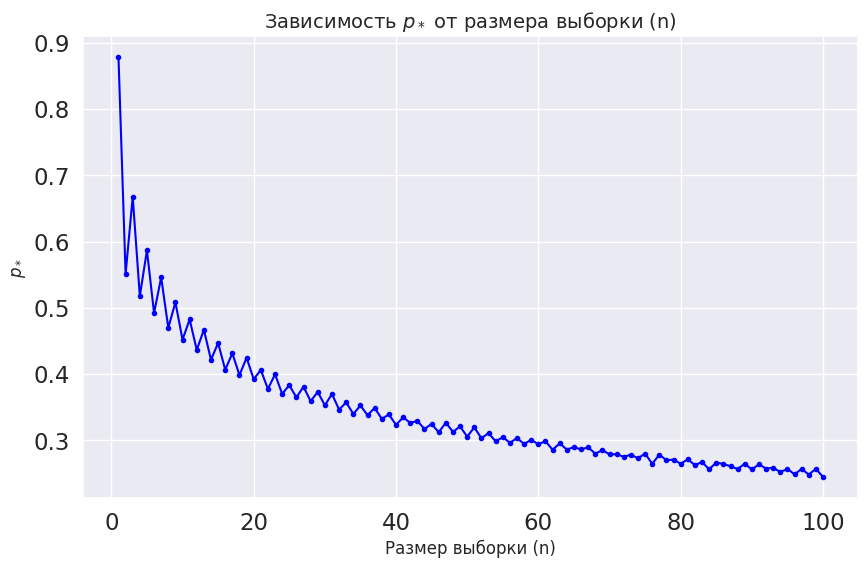

In [338]:
n_values = np.arange(1, 101, 1) 
p_star_values = []

num_samples = 10000
for n in n_values:
    p_star = calculate_integral_monte_carlo(num_samples, n, d_n, 0, 1)
    p_star_values.append(p_star)

plt.figure(figsize=(10, 6))
plt.plot(n_values, p_star_values, marker='.', color='blue')
plt.xlabel('Размер выборки (n)', fontsize=12)
plt.ylabel(r'$p_*$', fontsize=12)
plt.title('Зависимость $p_*$ от размера выборки (n)', fontsize=14)
plt.show()

**Ответ:** Как видим, с увеличением размера выборки, доля случаев, когда оценка Ходжеса-Лемана лучше чем среднее убывает.

**Вывод:** 
1. Мы на практике подвердили, что MSE для оценка Ходжема-Лемана лучше чем MSE для среднего, при равномерном разбиении $\theta$ в 66% случаев, причем MSE Ходжеса-Лемана больше чем MSE среднего на отрезке [0.2, 0.8].

2. Мы убедились, что при использовании разных функций потерь, мы можем получить различные доли случаев, когда оценка Ходжеса-Лемана лучше чем среднее.

3. Мы пронаблюдали как ведет себя вероятность того, что оценка Ходжеса-Лемана лучше чем среднее при использовании абсолютной функции ошибок. Также нашли другую интерпретацию доли когда оценка Ходжеса-Лемана лучше среднего.

4. Зафикисировали, что доля случаев, когда оценка Ходжеса-Лемана лучше чем среднее падает с увеличением размера выборки. Причем убывание доли не монотонно.